<a href="https://colab.research.google.com/github/theaok/gisPy/blob/main/folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**interactive fun fun**: an actual map on its own can open in webbrowser :)

folium (and leafmap) are like google maps with stuff on it--great for:

-mapping at low level like neighborhoods, blocks, streets

-sharing with others



### plotly [do at home]

https://plotly.com/python/choropleth-maps/

its kinda in between gpd and folium/leafmap--more clickable and interactive than gpd, yet not using fully fledged online map interface like folium/leafmap


### folium

its been around for some time; stable; i had no issues

see

https://geopandas.org/en/stable/gallery/plotting_with_folium.html

https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html

https://python-visualization.github.io/folium/latest/user_guide.html

In [1]:
import time, webbrowser, zipfile

import pandas as pd
import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%capture
!pip install mapclassify
import mapclassify

In [42]:
f.__version__

'0.17.0'

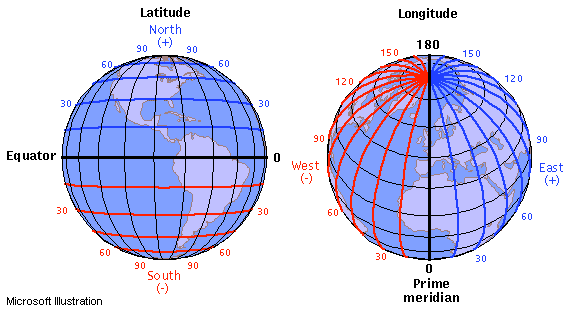

In [3]:
#note can put lat and long into google maps too
#m=
f.Map(location=[40, -75]) #open street map is default
#m.save('m.html')
#webbrowser.get('firefox').open_new_tab('m.html') #; webbrowser.open('m.html')

In [12]:
#one geocoder

#from geopandas.tools import geocode
#! pip install geocoder
from geopy.geocoders import Nominatim
#if you do a lot of geocoding: https://developers.google.com/maps/documentation/geocoding/overview
geolocator = Nominatim(user_agent='lala@gmail.com') #if they block you change email addr

loc = geolocator.geocode("401 cooper st, camden nj 08102")
loc.address
loc[1]
#(location.latitude, location.longitude)

'401, Cooper Street, Downtown, Camden, Camden County, New Jersey, 08102, United States'

(39.947189, -75.121843)

In [24]:
#another geocoder

#provider='photon' 'nominatim' and like 20 others #photon seems not exactly right, rather quite wrong
loc2=gpd.tools.geocode("401 cooper st, camden nj 08102",provider='nominatim',
                       user_agent='super adam', #adjust user agent to your name!
                       timeout=4) #this seems to not be blocked too soon as of fa2024
loc2
loc2.geometry

geometry  \
0  POINT (-75.12184 39.94719)   

                                             address  
0  401, Cooper Street, Downtown, Camden, Camden C...

0    POINT (-75.12184 39.94719)
Name: geometry, dtype: geometry

In [7]:
gpd.tools.geocode(["boston, ma", "1600 pennsylvania ave. washington, dc"]

geometry  \
0  POINT (-71.06051 42.35543)   
1   POINT (-77.03655 38.8977)   

                                             address  
0               Boston, Massachusetts, United States  
1  White House, 1600, Pennsylvania Avenue Northwe...

In [81]:
(loc2.geometry[0].y,loc2.geometry[0].x)

#f.Map(location=loc[1])
#f.Map(location=(loc2.geometry[0].y,loc2.geometry[0].x))

(39.947189, -75.121843)

In [82]:
# do see many cool options!: https://leaflet-extras.github.io/leaflet-providers/preview/
f.Map(location=loc[1], tiles='Cartodb Positron', zoom_start=16)

In [ ]:
f.Map(location=location[1], tiles='Cartodb dark_matter', zoom_start=6)

In [35]:
###adding markup by hand--easy! good for few u/a
m = f.Map(location=geolocator.geocode("401 cooper st, Camden nj 08102")[1], zoom_start=14)
#time.sleep(1)
f.Marker(geolocator.geocode("401 cooper st, Camden nj 08102")[1], popup='DPPA').add_to(m)
#time.sleep(1)
f.Marker(geolocator.geocode("321 cooper st, Camden nj 08102")[1], popup='bbb').add_to(m)
f.CircleMarker(geolocator.geocode("waterfront camden nj")[1], popup='waterfront').add_to(m)
#more cool options https://python-visualization.github.io/folium/latest/user_guide/vector_layers/circle_and_circle_marker.html
m.save('m.html') #and click on the left folder icon and download and open in webbrowser
m

In [38]:
'''can pick
icons:  http://www.w3schools.com/icons/bootstrap_icons_glyphicons.asp
colors: http://www.w3schools.com/colors/colors_names.asp
'''
m = f.Map(location=geolocator.geocode("401 cooper st camden nj")[1], zoom_start=10)
f.Marker(geolocator.geocode("401 cooper st camden nj")[1],
                     popup='i love this place!',icon = f.Icon(icon = 'cloud' ,color = 'green')).add_to(m)
f.CircleMarker(geolocator.geocode("2 Riverside Dr, Camden, NJ 08103")[1], popup='waterfront'
,color='#8A2BE2',fill_color='#F0F8FF').add_to(m)
#m.save('m8.html')
m

'can pick color, icon\nicons: http://www.w3schools.com/icons/bootstrap_icons_glyphicons.asp\ncolors: http://www.w3schools.com/colors/colors_names.asp\n'

#### many points

In [43]:
aptPhi0=pd.read_excel('https://github.com/theaok/data/raw/main/apartments-for-rent.xls')
aptPhi0.head(3)
aptPhi0.columns

Philadelphia Apartments Property Overview    Phone Number  \
0                      The Granary    All Floorplans  (215) 716-1675   
1  Beacon Pointe Luxury Apartments    All Floorplans  (844) 627-2575   
2         Chestnut Hall Apartments    All Floorplans  (888) 775-4524   

              Address          City State    Zip  Neighborhood     Map  \
0  1901 Callowhill St  Philadelphia    PA  19130           NaN  Map It   
1       9503 State Rd  Philadelphia    PA  19114           NaN  Map It   
2    3900 Chestnut St  Philadelphia    PA  19104           NaN  Map It   

   Efficiency/Studios  ...  Access Gates  Furnished  Cable-Ready  \
0                   1  ...                                   Yes   
1                1000  ...           Yes                     Yes   
2                1015  ...                                         

   Short-term Available  Cats Allowed  Small Dogs Allowed Large Dogs Allowed  \
0                                                                              
1                                 Yes                                          
2                                                                              

  Pets Negotiable Wheelchair Accessible  \
0                                         
1                                         
2                                         

                                                 URL  
0  http://www.apartmenthomeliving.com/apartment-f...  
1  http://www.apartmenthomeliving.com/apartment-f...  
2  http://www.apartmenthomeliving.com/apartment-f...  

[3 rows x 38 columns]

Index(['Philadelphia Apartments', 'Property Overview', 'Phone Number',
       'Address', 'City', 'State', 'Zip', 'Neighborhood', 'Map',
       'Efficiency/Studios', '1 Bedroom', '2 Bedroom', '3 Bedroom',
       '4 Bedroom', 'Lofts', 'Townhomes', 'Allows Pets', 'Air Conditioning',
       'Fitness Center', 'Parking', 'Pool(s)', 'Onsite Laundry',
       'Washer/Dryer in Unit', 'Washer/Dryer Hookups', 'Walk-in Closet',
       'Hardwood Floors', 'Wireless Internet', 'Garage', 'Access Gates',
       'Furnished', 'Cable-Ready', 'Short-term Available', 'Cats Allowed',
       'Small Dogs Allowed', 'Large Dogs Allowed', 'Pets Negotiable',
       'Wheelchair Accessible', 'URL'],
      dtype='object')

In [44]:
aptPhi=aptPhi0.loc[0:5, ['Philadelphia Apartments','Address','City','State','Zip','1 Bedroom']] #just subset to 5 for faster geocoding
aptPhi

Philadelphia Apartments             Address          City State  \
0                      The Granary  1901 Callowhill St  Philadelphia    PA   
1  Beacon Pointe Luxury Apartments       9503 State Rd  Philadelphia    PA   
2         Chestnut Hall Apartments    3900 Chestnut St  Philadelphia    PA   
3                     Vernon House    3226 Clifford St  Philadelphia    PA   
4                   Walnut Terrace     401 W Walnut Ln  Philadelphia    PA   
5           NPDF - The Cornerstone       400 S 48th St  Philadelphia    PA   

     Zip  1 Bedroom  
0  19130       1925  
1  19114       1185  
2  19104       1325  
3  19121        469  
4  19144        740  
5  19143        700

In [45]:
aptPhi['combined'] = aptPhi[['Address','City','State','Zip']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
aptPhi

Philadelphia Apartments             Address          City State  \
0                      The Granary  1901 Callowhill St  Philadelphia    PA   
1  Beacon Pointe Luxury Apartments       9503 State Rd  Philadelphia    PA   
2         Chestnut Hall Apartments    3900 Chestnut St  Philadelphia    PA   
3                     Vernon House    3226 Clifford St  Philadelphia    PA   
4                   Walnut Terrace     401 W Walnut Ln  Philadelphia    PA   
5           NPDF - The Cornerstone       400 S 48th St  Philadelphia    PA   

     Zip  1 Bedroom                                  combined  
0  19130       1925  1901 Callowhill St Philadelphia PA 19130  
1  19114       1185       9503 State Rd Philadelphia PA 19114  
2  19104       1325    3900 Chestnut St Philadelphia PA 19104  
3  19121        469    3226 Clifford St Philadelphia PA 19121  
4  19144        740     401 W Walnut Ln Philadelphia PA 19144  
5  19143        700       400 S 48th St Philadelphia PA 19143

In [46]:
#playing around to figure things out
#geolocator.geocode(aptPhi['combined'][0])[1]
#for i in aptPhi.index:
#  print(i)

m = f.Map(location=geolocator.geocode("philadelphia")[1], zoom_start=9)
for i in aptPhi.index:
  time.sleep(1)
  f.Marker(geolocator.geocode(aptPhi['combined'][i])[1], popup='1brm price: '+ aptPhi['1 Bedroom'][i].astype(str)).add_to(m)
#m.save('m7.html')
m

##### [*] more convoluted way

turn to gpd, then list of lists and then map that with add_children

In [49]:
aptPhi[['geometry','addrNom']] = geocode(aptPhi['combined'], provider='nominatim', user_agent='blah@gmail.com',timeout=2)

In [50]:
aptPhi.head(2)

Philadelphia Apartments             Address          City State  \
0                      The Granary  1901 Callowhill St  Philadelphia    PA   
1  Beacon Pointe Luxury Apartments       9503 State Rd  Philadelphia    PA   

     Zip  1 Bedroom                                  combined  \
0  19130       1925  1901 Callowhill St Philadelphia PA 19130   
1  19114       1185       9503 State Rd Philadelphia PA 19114   

                     geometry  \
0  POINT (-75.17069 39.96038)   
1  POINT (-74.98335 40.04907)   

                                             addrNom  
0  1901, Callowhill Street, Center City, Philadel...  
1  Beacon Pointe, 9503, State Road, Delaire Landi...

In [51]:
gdf = gpd.GeoDataFrame(aptPhi, geometry='geometry') #, crs="EPSG:4326"
gdf.get_coordinates()
#gdf.plot()

x          y
0 -75.170686  39.960382
1 -74.983350  40.049070
2 -75.200373  39.954985
3 -75.187552  39.983113
4 -75.187279  40.033068
5 -75.218480  39.952446

In [52]:
lolR=gdf.get_coordinates().values.tolist()
#lolR
lol=[li[::-1] for li in lolR] #inverse elements in list

In [53]:
m = f.Map(location=geolocator.geocode("philadelphia")[1], zoom_start=14)
m.add_children(MarkerCluster(locations=lol))
#m

<ipython-input-53-05ff4766ecf1>:2: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  m.add_children(MarkerCluster(locations=lol))


#### marker clusterer, heatmap

many points, clustering, USEFUL! fancy!

http://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

we do sf, but there are nj data too for about $100:
https://force.nj.com/ (few years back student was able to get lat lon); and nj ag for free (down to municipality):
https://www.njoag.gov/force/ and data:
https://njoag.app.box.com/s/upgf6yyi9g0fyjg6ednhqmr69dg9crfh

<br>philly shooting data (free!)
https://controller.phila.gov/philadelphia-audits/mapping-gun-violence/#/?year=2023&map=11.00%2F39.98500%2F-75.15000

In [54]:
!wget -q -O sfCrim.csv  https://raw.githubusercontent.com/devanshmanu/StravAdd/master/SFPD_Incidents_-_Current_Year__2015_.csv

sfCrim = pd.read_csv('sfCrim.csv')
len(sfCrim)

#sfCrim[1:3]
sfCrim=sfCrim[0:1000] #for speed purposes
sfCrim.head(3)

112331

IncidntNum      Category                         Descript DayOfWeek  \
0   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED    Sunday   
1   150827213       ASSAULT      INFLICT INJURY ON COHABITEE    Sunday   
2   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE    Sunday   

         Date   Time PdDistrict      Resolution                   Address  \
0  09/20/2015  23:54   RICHMOND       UNFOUNDED  3000 Block of CLEMENT ST   
1  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
2  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   

            X          Y                               Location  
0 -122.491851  37.781756  (37.7817557255921, -122.491851328976)  
1 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
2 -122.413676  37.712617  (37.7126165766239, -122.413676487435)

In [55]:
#create empty map zoomed in on San Francisco
m = f.Map(location=(37.76, -122.45), zoom_start=12)

loc = []
#add a marker for every record in the filtered data
for each in sfCrim.iterrows():
    loc.append([each[1]['Y'],each[1]['X']])

loc[1:3]

m.add_children(MarkerCluster(locations=loc)) #use a clustered view
#m.save('m10.html')
#very cool! hover over it--pups u in blue a polygon that the aggregate refers to!

[[37.7126165766239, -122.413676487435], [37.7126165766239, -122.413676487435]]

<ipython-input-55-8c743082f7b2>:11: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  m.add_children(MarkerCluster(locations=loc)) #use a clustered view


In [ ]:
#now with crim popup
sanfran_map = f.Map(location = [37.76, -122.45], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(sfCrim.Y, sfCrim.X, sfCrim.Category):
    f.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [84]:
### heatmap http://www.jackboot7.com/visualizing-tweets.html
m = f.Map(location=(37.76, -122.45), zoom_start=12) #,width=1500,height=700
m.add_children(HeatMap(loc))

<ipython-input-84-d681b149332b>:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  m.add_children(HeatMap(loc))


#### polygons

folium works easily with geojson, can google for it just like you did with shapefiles, or gpd can save as geojson

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_json.html

or can just stick with gpd, see below 'ex: gpd: nj pop'

In [56]:
#adding geojson
map = f.Map()
#map
f.GeoJson('https://raw.githubusercontent.com/datasets/geo-admin1-us/master/data/admin1-us.geojson').add_to(map)
map #see its on the fly, ie leaflet loads geojson off the internet without downloading

##### quick n dirty choloropleth: geojson+csv (skip (no proper merge))

In [76]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

states = gpd.read_file(state_geo)
state_data.head(50)

State  Unemployment
0     AL           7.1
1     AK           6.8
2     AZ           8.1
3     AR           7.2
4     CA          10.1
5     CO           7.7
6     CT           8.4
7     DE           7.1
8     FL           8.2
9     GA           8.8
10    HI           5.4
11    ID           6.6
12    IL           8.8
13    IN           8.4
14    IA           5.1
15    KS           5.6
16    KY           8.1
17    LA           5.9
18    ME           7.2
19    MD           6.8
20    MA           6.7
21    MI           9.1
22    MN           5.6
23    MS           9.1
24    MO           6.7
25    MT           5.8
26    NE           3.9
27    NV          10.3
28    NH           5.7
29    NJ           9.6
30    NM           6.8
31    NY           8.4
32    NC           9.4
33    ND           3.2
34    OH           6.9
35    OK           5.2
36    OR           8.5
37    PA           8.0
38    RI          10.1
39    SC           8.8
40    SD           4.4
41    TN           7.8
42    TX           6.4
43    UT           5.5
44    VT           5.0
45    VA           5.8
46    WA           7.8
47    WV           7.5
48    WI           6.8
49    WY           5.1

In [75]:
m = f.Map(location=[40, -95], zoom_start=4)
f.Choropleth(
    geo_data=state_geo, #geo data obj: state_geo
    name="choropleth",
    data=state_data,   #regular data object
    columns=["State", "Unemployment"], # 1st var is join or merge var; 2nd is map var
    #KLUDGE: may not merge! first do a dry run to make sure everything merges fine: do see next example!!
    key_on="feature.id",  #this is merge/join var from geojson; just prefix ith 'feature
    fill_color="YlGnBu", #pick some color, opacities
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Unemployment Rate (%)",
).add_to(m)

f.LayerControl().add_to(m)

m #uncomment to see map
#m.save('m2.html')

#####  ex: countries eco footprint
elaboration: https://realpython.com/python-folium-web-maps-from-data/

In [85]:
#https://en.wikipedia.org/wiki/List_of_countries_by_ecological_footprint
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_ecological_footprint',match='Biocapacity',flavor=None)[0].head(3)

Rank Country/region Ecological footprint  Biocapacity  \
  Rank Country/region         (gha/person) (gha/person)   
0  NaN          World                 2.75         1.63   
1  1.0     Luxembourg                15.82         1.68   
2  2.0          Aruba                11.88         0.57   

  Biocapacity deficit or reserve Population (millions)  \
                    (gha/person) Population (millions)   
0                          -1.12               7753.00   
1                         −14.14                  0.63   
2                         −11.31                  0.17   

  Total biocapacity deficit or reserve (gMha)  \
  Total biocapacity deficit or reserve (gMha)   
0                                      -10400   
1                                       −7.35   
2                                       −1.13   

  Population (millions) for biocapacity to equal ecological footprint*  
  Population (millions) for biocapacity to equal ecological footprint*  
0                                        2500.000000                    
1                                           0.055221                    
2                                           0.004798

In [86]:
eco_footprints=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_ecological_footprint',match='Biocapacity',flavor=None)[0]
eco_footprints['ecoFoo']=eco_footprints['Ecological footprint'].astype(float)
eco_footprints.columns = eco_footprints.columns.get_level_values(0) #bc there were 2 lev of cols
eco_footprints=eco_footprints[['Country/region','ecoFoo']]
eco_footprints

Country/region  ecoFoo
0            World    2.75
1       Luxembourg   15.82
2            Aruba   11.88
3            Qatar   10.80
4        Australia    9.31
..             ...     ...
185       Pakistan    0.79
186     Bangladesh    0.72
187          Haiti    0.61
188    Timor-Leste    0.48
189        Eritrea    0.49

[190 rows x 2 columns]

In [87]:
#m = f.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")
#f.GeoJson('http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson').add_to(m)
##m.save("footprint.html")
#m

! wget -q -O a.geojson 'http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson'
#! cat a.geojson
a0=gpd.read_file('a.geojson') #.head(3)
a=a0[['admin','geometry']]

In [88]:
b=pd.merge(a,eco_footprints,left_on='admin',right_on='Country/region',indicator=True,how='outer')
b._merge.value_counts() #aha! error! need to fix it up!

_merge
both          175
left_only      66
right_only     15
Name: count, dtype: int64

In [89]:
#b[['admin',"Country/region", "ecoFoo",'_merge']] #ok mostly small places, just fix up the us
eco_footprints2=eco_footprints
eco_footprints2['Country/region'].replace('United States','United States of America',inplace=True)
b=pd.merge(a,eco_footprints2,left_on='admin',right_on='Country/region',indicator=True,how='inner')
b._merge.value_counts()
#always make a note whats up with nonmerges, eg:
#fixed US, other small places ~15 (right_only) ignored for now (value your time!)

<ipython-input-89-50d5c7b6a38c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eco_footprints2['Country/region'].replace('United States','United States of America',inplace=True)


_merge
both          176
left_only       0
right_only      0
Name: count, dtype: int64

In [80]:
m = f.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")

max_eco_footprint = eco_footprints["ecoFoo"].max()

f.Choropleth(

    geo_data=b,

    data=b,

    columns=["Country/region", "ecoFoo"],

    key_on="feature.properties.admin", #need to add beofre var: feature.properties.

    fill_color="RdYlGn_r",

    fill_opacity=0.8,

    line_opacity=0.3,

    nan_fill_color="white", #important!

    legend_name="Ecological footprint per capita; white=missing",
#FIXME alwasy define var as preceisely as possible, esp if unclear like here, eco footprint, eg could add say, kg of co2
    bins=[0, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, max_eco_footprint],
#FIXME there is too big spread on top bin 8-16!
    #or can do jenks-breaks: https://vialab.mit.edu/tutorials/module/mapping-in-python-folium/

).add_to(m)

#m #uncomment to see map

##### ex: gpd: nj pop
back to gpd and jersey!<br>

we started with gpd for a good reason: simple, stable, and versatile--and can stick with it here and use in folium (instead of more native geojson)


In [5]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njC0=gpd.read_file('nj_counties.shp')
njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]

<Axes: >

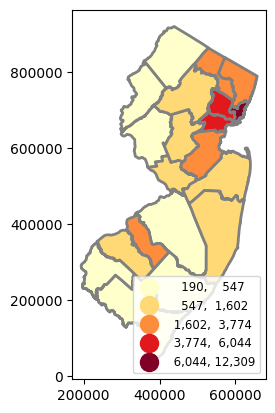

In [6]:
#remember our first map?
njC.plot(column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

In [11]:
m = f.Map(location=[40, -75], zoom_start=8)

f.Choropleth(
    geo_data=njC,
    name="choropleth",
    data=njC,
    columns= ["COUNTY","POPDEN2010"],
    key_on="feature.properties.COUNTY", #need to add beofre var: feature.properties.
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=[100, 550, 1500, 4000, 6000, 12000, 13000],
    legend_name="Population Density By County (pers per sq mi?), 2010").add_to(m)

f.LayerControl().add_to(m)
#m #uncomment to see the map (for memory saving)
#note 100 and 550 overlap on scale: should do thousands of ppl, ie divide var by 1k

In [70]:
# can do quantile like this; for others like natural breaks can do first in gpd and then use cutoffs by hand as above
bins = list(njC["POPDEN2010"].quantile([0, 0.25, 0.50, 0.75, 1]))
bins
#more ideas: https://vverde.github.io/blob/interactivechoropleth.html

[190.0, 340.0, 1023.0, 2527.0, 12309.0]

<Axes: >

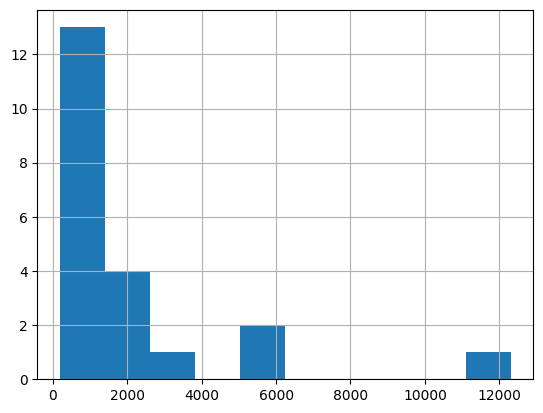

In [20]:
njC.POPDEN2010.hist(bins=10)

count        21.000000
mean     418661.619048
std      252391.802799
min       66083.000000
25%      156898.000000
50%      448734.000000
75%      576567.000000
max      905116.000000
Name: POP2010, dtype: float64

<Axes: >

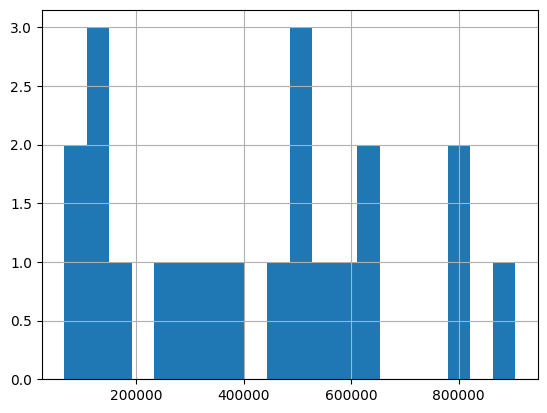

In [23]:
njC.POP2010.describe()
njC.POP2010.hist(bins=20)

In [35]:
## multiple layers
m = f.Map(location=[40, -75], tiles='Cartodb Positron', zoom_start=8)

f.Choropleth(
    geo_data=njC,
    name="population density 2010",
    data=njC,
    columns= ["COUNTY","POPDEN2010"],
    key_on="feature.properties.COUNTY", #need to add beofre var: feature.properties.
    fill_color="YlOrRd",
    fill_opacity=1,
    line_opacity=0.3,
    bins=[100, 550, 1500, 4000, 6000, 12000, 13000],
    legend_name="Population Density By County (pers per sq mi?), 2010").add_to(m)

f.Choropleth(
    geo_data=njC,
    name="population size 2010",
    data=njC,
    columns= ["COUNTY","POP2010"],
    key_on="feature.properties.COUNTY", #need to add beofre var: feature.properties.
    fill_color="Blues",
    fill_opacity=1,
    line_opacity=0.3,
    bins=[50000, 200000, 400000, 700000, 1000000],
    legend_name="Population Size By County (persons, 2010").add_to(m)

f.LayerControl().add_to(m)
#m #uncomment to see the map (for memory saving)

##### tooltip/popups

neat, cool functionality

https://vverde.github.io/blob/interactivechoropleth.html

https://towardsdatascience.com/folium-and-choropleth-map-from-zero-to-pro-6127f9e68564

<Axes: >

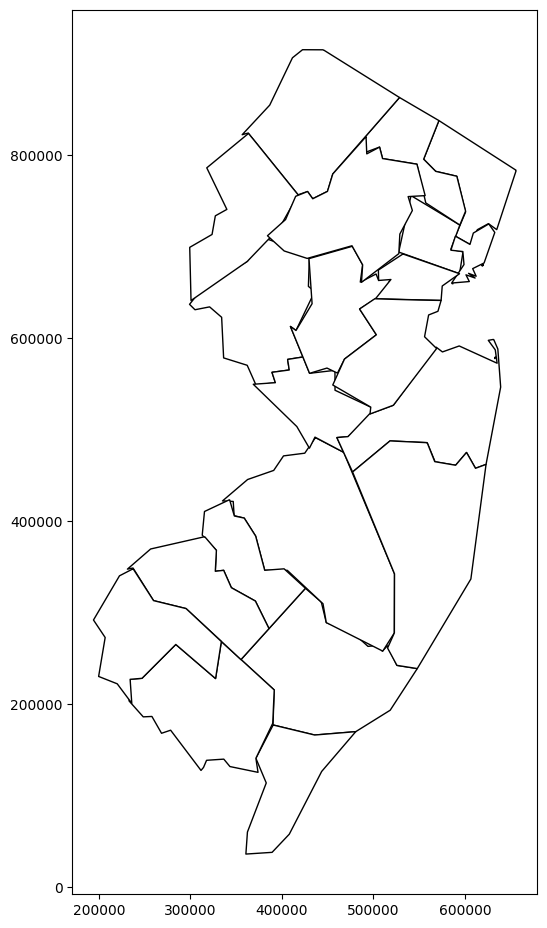

In [7]:
njC1=njC.copy()
njC1['geometry'] = njC1.simplify(tolerance=5000) #huge difference like 1,000x with html map like 15kb v 15mb
njC1.plot(figsize=(6,12), color='white', edgecolor='black',linewidth=1)

In [8]:
m = f.Map(location=[40, -75], zoom_start=8)

style_function = lambda x: {'fillColor': '#ffffff', #it makes it look cleaner without nasty default blue thick borders
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', #it highlights polygon when hover over
                                'color':'#000000',
                                'fillOpacity': 0.50,
                                'weight': 0.1}
NIL = f.features.GeoJson(
    njC1,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function,
    tooltip=f.features.GeoJsonTooltip(
        fields=['COUNTY','POPDEN2010'],
        aliases=['county: ','pop den (pers per sq mi?): '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

f.Choropleth(
    geo_data=njC1,
    name="choropleth",
    data=njC1,
    columns= ["COUNTY","POPDEN2010"],
    key_on="feature.properties.COUNTY", #need to add beofre var: feature.properties.
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=[100, 550, 1500, 4000, 6000, 12000, 15000],
    legend_name="Population Density By County (pers per sq mi?), 2010").add_to(m)

m.add_child(NIL)
#m.keep_in_front(NIL)
#f.LayerControl().add_to(m)
m.save('m.html')

In [105]:
files.download('m.html') #may take like 5sec if original njC, not njC1; your os will probably prompt you to open in webbrowser, do it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

btw since you have interactive vis in html/java script, put it on your website; you can get free website off github, instructions: https://www.khanacademy.org/computing/computer-programming/html-css/web-development-tools/a/hosting-your-website-on-github or https://www.geeksforgeeks.org/using-github-to-host-a-free-static-website/

and then upload the html there, i did for my github:
https://theaok.github.io/junk/m.html

and then you can embed it in another website with:

`<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://theaok.github.io/junk/m.html" height="600" width="900"></iframe>`

as i did: https://theaok.github.io/junk/mm.html , and lets see page source

note this is unoptimized 15mb version zoom in: ton of unnecessary detail!

#### other examples

animated: covid in india, bus in nyc etc https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/

#### draw

useful to create your own data :)

In [ ]:
from folium.plugins import Draw

m = f.Map()

Draw(export=True).add_to(m)

#hit export button in the map below to export (it downloads on your local hd)
m #before adding too much, make sure it exports and loads back ok;
  #eg i had issue with stuff (eg circle) didnt display--it may be mixing points with lines and polygons
  #better have one type only and export each as separate layer

In [ ]:
#then click folder icon on the left and upload data.geojson from local hd
map = f.Map()
f.GeoJson('data(3).geojson').add_to(map)
map

can also draw in https://www.google.com/maps/d/
lets check it out!

and can export/import in kml/kmz which can be converted with gpd: see gpd notebook sec 'I/O'


#### other plugins

In [ ]:
#fullscreen :0 actually very neat
m = f.Map(location=[41.9, -97.3], zoom_start=4)

f.plugins.Fullscreen(
    position="topright",
    title="Expand me",
    title_cancel="Exit me",
    force_separate_button=True,
).add_to(m)

m

and there's more--check out:
https://python-visualization.github.io/folium/latest/user_guide/plugins.html

### [*] leafmap

fa24: nah, skip it; give it few more years to mature

just skim through quickly like 15min

we list it as 2nd to leaflet as it does require more dependencies; also may be more buggy

lots of great functionality; easy to use

also interactive! almost like full blown gis soft like qgis: eg click on the right the toolbox and can do a ton of stuff incl open attr table etc (may need additional libraries like ipysheet)

In [ ]:
!pip install leafmap
!pip install pycrs
!pip install osmnx
!pip install mapclassify

In [ ]:
#ton of dependencies; also saying here which for what not to get lost
import leafmap
import pycrs #may be needed for some imported data such as shapefiles
import geopandas #may be needed to for some files such a kml
import osmnx #for geocoding, eg we geocode camden
import mapclassify #for thematic maps

In [ ]:
#leafmap.basemaps.keys() #ton of possible basemaps

In [ ]:
m = leafmap.Map(
    #google_map="ROADMAP", # ROADMAP HYBRID #change basemap
    center=(40, -100), zoom=4, height="400px", width="800px",
    #draw_control=False, #turn off controls
    #measure_control=False,
    #fullscreen_control=False,
    #attribution_control=True,
    )
#m.to_html("mymap.html")
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
#add geojson
m = leafmap.Map(center=[0, 0], zoom=2)
cou = "https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/countries.geojson"
cab = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/cable_geo.geojson'
style = {
    "stroke": True,
    "color": "#0000ff",
    "weight": 2,
    "opacity": 1,
    "fill": True,
    "fillColor": "#0000ff",
    "fillOpacity": 0.1,
}
hover_style = {"fillOpacity": 0.7}
m.add_geojson(cou, layer_name="Countries", style=style, hover_style=hover_style)
m.add_geojson(cab, layer_name="Cable lines")
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [ ]:
#add shapefile
m = leafmap.Map(center=[0, 0], zoom=2)
in_shp = 'https://github.com/giswqs/leafmap/raw/master/examples/data/countries.zip'
m.add_shp(in_shp, layer_name="Countries")
m


Downloading...
From: https://github.com/giswqs/leafmap/raw/master/examples/data/countries.zip
To: /tmp/countries.zip
100%|██████████| 132k/132k [00:00<00:00, 3.97MB/s]


Extracting files...


Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [ ]:
#add kml
m = leafmap.Map()
in_kml = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_states.kml'
m.add_kml(in_kml, layer_name="US States KML")
m

Downloading...
From: https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_states.kml
To: /content/us_states.kml
95.4kB [00:00, 5.34MB/s]                   


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
#can add csv straightup as long as have x y
m = leafmap.Map()
df = pd.read_csv('https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_cities.csv') #pandas
m.add_points_from_xy(df, x="longitude", y="latitude")
m
###straight from csv file:
#m = leafmap.Map()
#data = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_cities.csv'
#m.add_points_from_xy(data, x="longitude", y="latitude")
#m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
#heatmap
m = leafmap.Map()
in_csv = "https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/world_cities.csv"
m.add_heatmap(
    in_csv,
    latitude="latitude",
    longitude='longitude',
    value="pop_max",
    name="Heat map",
    radius=15, #play with radius to achieve desired heat
)
colors = ['blue', 'lime', 'red']
vmin = 0
vmax = 10000
m.add_colorbar(colors=colors, vmin=vmin, vmax=vmax)
m.add_title("World Population Heat Map", font_size="20px", align="center")
m

The ipyleaflet map does not support titles.


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
#thematic map
data = "https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/countries.geojson"
m = leafmap.Map()
m.add_data(
    data, column='POP_EST', scheme='Quantiles', cmap='Blues', legend_title='Population'
)
m
'''classification schemes:
BoxPlot
EqualInterval
FisherJenks
FisherJenksSampled
HeadTailBreaks
JenksCaspall
JenksCaspallForced
JenksCaspallSampled
MaxP
MaximumBreaks
NaturalBreaks
Quantiles
Percentiles
StdMean
UserDefined'''

'classification schemes:\nBoxPlot\nEqualInterval\nFisherJenks\nFisherJenksSampled\nHeadTailBreaks\nJenksCaspall\nJenksCaspallForced\nJenksCaspallSampled\nMaxP\nMaximumBreaks\nNaturalBreaks\nQuantiles\nPercentiles\nStdMean\nUserDefined'

In [ ]:
#geocode
m = leafmap.Map(toolbar_control=False, layers_control=True)
m.add_osm_from_geocode("Camden NJ", layer_name='Cam')
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
#add census data
for key in leafmap.get_census_dict():
    print(key)

Current
ACS 2021
ACS 2019
ACS 2018
ACS 2017
ACS 2016
ACS 2015
ACS 2014
ACS 2013
ACS 2012
ECON 2012
Census 2020
Census 2010
Physical Features
Decennial Census 2020
Decennial Census 2010
Decennial Census 2000
Decennial Physical Features


In [ ]:
census_data_dict = leafmap.get_census_dict()
census_data_dict['Census 2020']['layers']

['Alaska_Native_Regional_Corporations10465',
 'Alaska_Native_Regional_Corporations_Labels60868',
 'Alaska_Native_Village_Statistical_Areas34178',
 'Alaska_Native_Village_Statistical_Areas_Labels14319',
 'American_Indian_Joint-Use_Areas11842',
 'American_Indian_Joint-Use_Areas_Labels32943',
 'Census_Block_Groups59805',
 'Census_Block_Groups_Labels32376',
 'Census_Blocks1978',
 'Census_Blocks_Labels63431',
 'Census_Designated_Places65166',
 'Census_Designated_Places_Labels61459',
 'Census_Divisions8578',
 'Census_Divisions_Labels29679',
 'Census_Regions16659',
 'Census_Regions_Labels31526',
 'Census_Tracts7651',
 'Census_Tracts_Labels33558',
 'Combined_New_England_City_and_Town_Areas35117',
 'Combined_New_England_City_and_Town_Areas_Labels20328',
 'Combined_Statistical_Areas61231',
 'Combined_Statistical_Areas_Labels52090',
 'Consolidated_Cities65047',
 'Consolidated_Cities_Labels30018',
 'Counties',
 'Counties_Labels19364',
 'County_Subdivisions63689',
 'County_Subdivisions_Labels25452'

In [ ]:
m = leafmap.Map(zoom=5,center=[40,-90])
m.add_census_data(wms="Census 2020", layer="States")
m.add_census_data(wms="Census 2020", layer="States_Labels49388")
m
#or in toolbox click 9th icon Get US Census Data; need to zoom; and may not work (i had issues with some)

Map(center=[40, -90], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [ ]:
#vis land cover change #hit toolbar on the right, Layers, and turn on and off 2019
m = leafmap.Map(center=[36.1, -115.2],zoom=9)
m.add_basemap('NLCD 2001 CONUS Land Cover')
m.add_basemap('NLCD 2019 CONUS Land Cover')
m.add_legend(builtin_legend='NLCD')
m

Map(center=[36.1, -115.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [ ]:
#lidar WONT RUN IN COLAB, need other interpreter; or maybe other backend
#https://leafmap.org/notebooks/48_lidar/
#!pip install laspy[lazrs,laszip]
#!pip install leafmap[lidar] open3d

In [ ]:
#url = 'https://github.com/giswqs/data/raw/main/lidar/madison.zip'
#filename = 'madison.las'
#if not os.path.exists(filename):
#    leafmap.download_file(url, 'madison.zip', unzip=True)

In [ ]:
#las = leafmap.read_lidar(filename)
#las.header


In [ ]:
#leafmap.view_lidar(filename, backend='open3d', background='white')